# Building the Best AND Gate

In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.providers.aer import noise
import numpy as np

In Problem Set 1, you made an AND gate with quantum gates. This time you'll do the same again, but for a real device. Using real devices gives you two major constraints to deal with. One is the connectivity, and the other is noise.

The connectivity tells you what `cx` gates it is possible to do perform directly. For example, the device `ibmq_5_tenerife` has five qubits numbered from 0 to 4. It has a connectivity defined by

In [2]:
coupling_map = [[1, 0], [2, 0], [2, 1], [3, 2], [3, 4], [4, 2]]

Here the `[1,0]` tells us that we can implement a `cx` with qubit 1 as control and qubit 0 as target, the `[2,0]` tells us we can have qubit 2 as control and 0 as target, and so on. The are the `cx` gates that the device can implement directly.

The 'noise' of a device is the collective effects of all the things that shouldn't happen, but nevertheless do happen. Noise results in the output not always having the result we expect. There is noise associated with all processes in a quantum circuit: preparing the initial states, applying gates and measuring the output.  For the gates, noise levels can vary between different gates and between different qubits. The `cx` gates are typically more noisy than any single qubit gate.

We can also simulate noise using a noise model. And we can set the noise model based on measurements of the noise for a real device. The following noise model is based on `ibmq_5_tenerife`.



In [3]:
noise_dict = {'errors': [{'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0004721766167523067, 0.0004721766167523067, 0.0004721766167523067, 0.9985834701497431], 'gate_qubits': [[0]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0005151090708174488, 0.0005151090708174488, 0.0005151090708174488, 0.9984546727875476], 'gate_qubits': [[1]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0005151090708174488, 0.0005151090708174488, 0.0005151090708174488, 0.9984546727875476], 'gate_qubits': [[2]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.000901556048412383, 0.000901556048412383, 0.000901556048412383, 0.9972953318547628], 'gate_qubits': [[3]]}, {'type': 'qerror', 'operations': ['u2'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0011592423249461303, 0.0011592423249461303, 0.0011592423249461303, 0.9965222730251616], 'gate_qubits': [[4]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0009443532335046134, 0.0009443532335046134, 0.0009443532335046134, 0.9971669402994862], 'gate_qubits': [[0]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0010302181416348977, 0.0010302181416348977, 0.0010302181416348977, 0.9969093455750953], 'gate_qubits': [[1]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0010302181416348977, 0.0010302181416348977, 0.0010302181416348977, 0.9969093455750953], 'gate_qubits': [[2]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.001803112096824766, 0.001803112096824766, 0.001803112096824766, 0.9945906637095256], 'gate_qubits': [[3]]}, {'type': 'qerror', 'operations': ['u3'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0023184846498922607, 0.0023184846498922607, 0.0023184846498922607, 0.9930445460503232], 'gate_qubits': [[4]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.002182844139394187, 0.9672573379090872], 'gate_qubits': [[1, 0]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.0020007412998552473, 0.9699888805021712], 'gate_qubits': [[2, 0]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.002485439516158936, 0.9627184072576159], 'gate_qubits': [[2, 1]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.0037502825428055767, 0.9437457618579164], 'gate_qubits': [[3, 2]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.004401224333760022, 0.9339816349935997], 'gate_qubits': [[3, 4]]}, {'type': 'qerror', 'operations': ['cx'], 'instructions': [[{'name': 'x', 'qubits': [0]}], [{'name': 'y', 'qubits': [0]}], [{'name': 'z', 'qubits': [0]}], [{'name': 'x', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'x', 'qubits': [1]}], [{'name': 'y', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'y', 'qubits': [1]}], [{'name': 'z', 'qubits': [1]}], [{'name': 'x', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'y', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'z', 'qubits': [0]}, {'name': 'z', 'qubits': [1]}], [{'name': 'id', 'qubits': [0]}]], 'probabilities': [0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.0046188825262438934, 0.9307167621063416], 'gate_qubits': [[4, 2]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.9372499999999999, 0.06275000000000008], [0.06275000000000008, 0.9372499999999999]], 'gate_qubits': [[0]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.9345, 0.0655], [0.0655, 0.9345]], 'gate_qubits': [[1]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.97075, 0.029249999999999998], [0.029249999999999998, 0.97075]], 'gate_qubits': [[2]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.9742500000000001, 0.02574999999999994], [0.02574999999999994, 0.9742500000000001]], 'gate_qubits': [[3]]}, {'type': 'roerror', 'operations': ['measure'], 'probabilities': [[0.8747499999999999, 0.12525000000000008], [0.12525000000000008, 0.8747499999999999]], 'gate_qubits': [[4]]}], 'x90_gates': []}
noise_model = noise.noise_model.NoiseModel.from_dict( noise_dict )

Running directly on the device requires you to have an IBMQ account, and for you to sign in to it within your program. In order to not worry about all this, we'll instead use a simulation of the 5 qubit device defined by the constraints set above.

In [4]:
qr = QuantumRegister(5, 'qr')
cr = ClassicalRegister(1, 'cr')
backend = Aer.get_backend('qasm_simulator')

We now define the `AND` function. This has a few differences to the version in Exercise 1. Firstly, it is defined on a 5 qubit circuit, so you'll need to decide which of the 5 qubits are used to encode `input1`, `input2` and the output. Secondly, the output is a histogram of the number of times that each output is found when the process is repeated over 10000 samples.

In [5]:
def AND (input1,input2, q_1=0,q_2=1,q_out=2):
    # The keyword q_1 specifies the qubit used to encode input1
    # The keyword q_2 specifies    qubit used to encode input2
    # The keyword q_out specifies    qubit to be as output
    
    qc = QuantumCircuit(qr, cr)
    
    # prepare input on qubits q1 and q2
    if input1=='1':
        qc.x( qr[ q_1 ] )
    if input2=='1':
        qc.x( qr[ q_2 ] )
    
    qc.ccx(qr[ q_1 ],qr[ q_2 ],qr[ q_out ]) # the AND just needs a c
    qc.measure(qr[ q_out ],cr[0]) # output from qubit 1 is measured
    
    # the circuit is run on a simulator, but we do it so that the noise and connectivity of Tenerife are also reproduced 
    job = execute(qc, backend, shots=10000, noise_model=noise_model,
                                             coupling_map=coupling_map,
                                             basis_gates=noise_model.basis_gates)
    output = job.result().get_counts()
    
    return output

For example, here are the results when both inputs are `0`.

{'0': 9046, '1': 954}


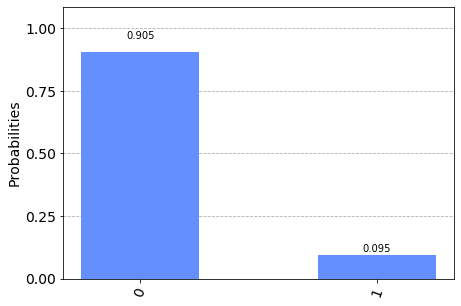

In [6]:
result = AND('0','0')
print( result )
plot_histogram( result )

We'll compare across all results to find the most unreliable.



In [7]:
worst = 1
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('\nProbability of correct answer for inputs',input1,input2)
        prob = AND(input1,input2, q_1=0,q_2=1,q_out=2)[str(int( input1=='1' and input2=='1' ))]/10000
        print( prob )
        worst = min(worst,prob)
print('\nThe lowest of these probabilities was',worst)


Probability of correct answer for inputs 0 0
0.9013

Probability of correct answer for inputs 0 1
0.8989

Probability of correct answer for inputs 1 0


0.9035

Probability of correct answer for inputs 1 1
0.8955

The lowest of these probabilities was 0.8955


The `AND` function above uses the `ccx` gate the implement the required operation. But you now know how to make your own. Find a way to implement an `AND` for which the lowest of the above probabilities is better than for a simple `ccx`.